In [1]:
import warnings
import pandas as pd
from IPython.display import Audio

seed = 14
sound_file = 'end.mp3'
warnings.filterwarnings('ignore')

raw_data = pd.read_excel('data/Data_diagnosis_complaints.xlsx')
raw_data

,name,mkb_code,ext_diagnosis,patient complaints,recommendations
0,"b01.047.001 прием (осмотр, консультация) врача...",I11.9 Гипертензивная [гипертоническая] болезнь...,Гипертоническая болезнь 2 ст Арт гипертония 1 ...,на момент осмотра периодическое повышение АД. ...,"стол №10, режим №2режим труда и отдыха, прием ..."
1,"b01.015.001 прием (осмотр, консультация) врача...",I11.9 Гипертензивная [гипертоническая] болезнь...,"Артериальная гипертония II ст, 2 ст, ОВР. Ги...","Жалобы на боли в области сердца,ноющего , давя...","проведена коррекция лечения - дальнева 5/8, би..."
2,"b01.047.002 прием (осмотр, консультация) врача...",I11.9 Гипертензивная [гипертоническая] болезнь...,NaN,прежние,диета контроль АД тромбо АСС по 100мг х 1 ...
3,"b01.047.001 прием (осмотр, консультация) врача...",I67.8 Другие уточненные поражения сосудов мозга,"ДЭП 11 ст сложного генеза(атеросклеротическая,...",шум в ушах.мушки перед глазами беспокоят реже....,лечение продолжить.
4,"b01.015.001 прием (осмотр, консультация) врача...",I11.9 Гипертензивная [гипертоническая] болезнь...,ИБС. . Стенокардия напряжения II ФК. Постинфар...,На Одышку при незначительной физ нагрузке. Не...,Физическая активность (ходьба в умеренном темп...
...,...,...,...,...,...
119775,"b01.064.001 прием (осмотр, консультация) врача...",NaN,NaN,на боли в зубе верхней челюсти слева.\nАнамнез...,NaN
119776,"b01.064.001 прием (осмотр, консультация) врача...",NaN,NaN,на наличие кариозной полости в 3.7.На застрева...,Улучшить гигиену полости рта.Рекомендована кон...
119777,"b01.001.001 прием (осмотр, консультация) врача...",D25.1 Интрамуральная лейомиома матки,NaN,NaN,Контроль УЗИ через 6 месяцев
119778,"b01.047.001 прием (осмотр, консультация) врача...",I11.9 Гипертензивная [гипертоническая] болезнь...,артериальная гипертония 2 ст. вр хсн0.,на головную боль.,Сделано:энап 1.25 мг\мл.+физ.раствор 0.9%-10.0...


In [2]:
data = pd.DataFrame(columns = ['text', 'target']) # initialize new DF with all main values

In [3]:
# cleaning from NaN values
data['text'] = raw_data['patient complaints'].dropna()
data['target'] = raw_data['mkb_code'].dropna()
data.dropna(inplace = True)
data.reset_index(drop = True, inplace= True)

In [4]:
# lenght filtering
data = data.loc[data['text'].str.len() > 50] 

In [5]:
# simple parser for mkb code
a = []
b = []
for item in data['target']:
    a.append(item[:3])
    b.append(item[0])
data['target'] = a
data['label'] = b

<AxesSubplot:ylabel='label'>

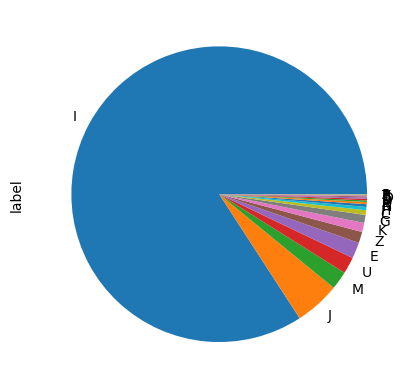

In [6]:
data['label'].value_counts().plot(kind = 'pie')

In [7]:
# sampling
from sklearn.utils import resample
classes = data['label'].unique()
final_data = data.loc[:1]
for i in classes:
    if i not in ['Z', 'M', 'J', 'U', 'E', 'K', 'I']:
        continue
    current = data[data['label'] == i]
    sampled = resample (current, replace = True, n_samples = 2000, random_state = seed)
    final_data = final_data.append(sampled)

<AxesSubplot:ylabel='label'>

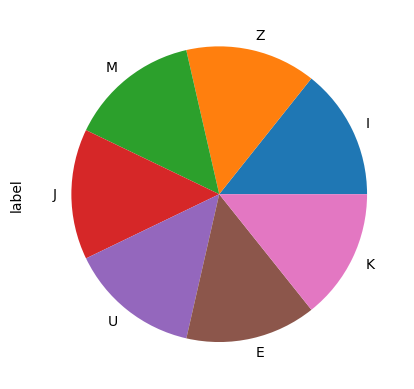

In [8]:
final_data['label'].value_counts().plot(kind = 'pie')

In [9]:
final_data['label'], _ = final_data['label'].factorize()

In [10]:
import re

#Removes Punctuations
def remove_punctuations(data):
    punct_tag = re.compile(r'[^\w\s]')
    data = punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean = re.compile(r"https://\S+|www\.\S+")
    data = url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data = emoji_clean.sub(r'',data)
    url_clean = re.compile(r"https://\S+|www\.\S+")
    data = url_clean.sub(r'',data)
    return data


final_data['text'] = final_data['text'].apply(lambda z: remove_punctuations(z))
final_data['text'] = final_data['text'].apply(lambda z: remove_html(z))
final_data['text'] = final_data['text'].apply(lambda z: remove_url(z))
final_data['text'] = final_data['text'].apply(lambda z: remove_emoji(z))

In [11]:
final_data.reset_index(drop= True, inplace= True)
final_data.to_csv('prepared1.csv', index_label= False)